## Môn: Phân tích xử lý ảnh
* Sinh viên: Huỳnh Thị Bảo Trân
* MSSV: 19110482
* Bài thực hành: lab04

In [1]:
import cv2
import numpy as np 
import pandas as pd
import scipy.fftpack
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from pylab import imread
from matplotlib import pyplot as plt 
from skimage.color import rgb2gray

0. Các hàm được sử dụng

In [2]:
def ShowImage(ImageList, nRows = 1, nCols = 2, WidthSpace = 0.00, HeightSpace = 0.00):
    gs = gridspec.GridSpec(nRows, nCols)     
    gs.update(wspace = WidthSpace, hspace = HeightSpace)
    plt.figure(figsize = (20, 10))
    
    for i in range(len(ImageList)):
        ax1 = plt.subplot(gs[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')

        plt.subplot(nRows, nCols,i+1)

        image = ImageList[i].copy()
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
        else:
            plt.imshow(image)
        plt.title('Image' + str(i))
        plt.axis('off')

    plt.show()

In [3]:
def Image3Dto2D(image):
    if(len(image.shape) >= 3):
        image_2D = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        image_2D = image.copy()

    return image_2D

In [4]:
def DFT_Transformation(image):
    img = Image3Dto2D(image) 

    img_float32 = np.float32(img)
    dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

    return magnitude_spectrum, dft_shift

In [5]:
def dct2(a):
    return scipy.fftpack.dct(scipy.fftpack.dct( a, axis = 0, norm = 'ortho'), axis = 1, norm = 'ortho')

In [6]:
def idct2(a):
    return scipy.fftpack.idct(scipy.fftpack.idct(a, axis = 0 , norm = 'ortho'), axis = 1, norm = 'ortho')

1. Kiếm một ảnh trên internet và thực hiện các bước sau : 
* Chuyển đổi thành ảnh xám 
* Biến đổi DFT và hiển thị ảnh ở miền tần số 
* Thực hiện tạo ảnh mask để bỏ miền tần số cao và hiển thị ảnh texture 
* Thực hiện tạo ảnh mask để bỏ miền tần số thấp và hiển thị ảnh edge 
* Thực hiện tạo ảnh mask như sau và thực hiện thay đổi miền tần số sau đó xuất ảnh kết quả 

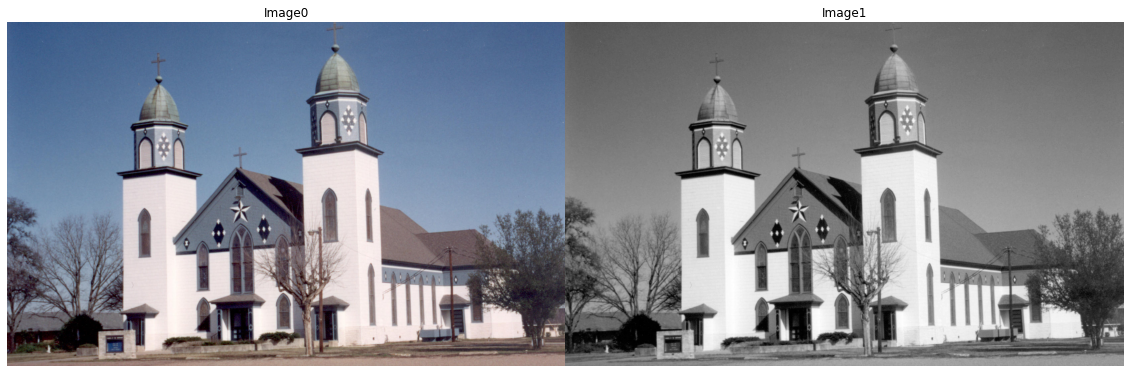

In [7]:
image_color = imread('church.jpg')
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

ShowImage([image_color, image_gray], 1, 2)

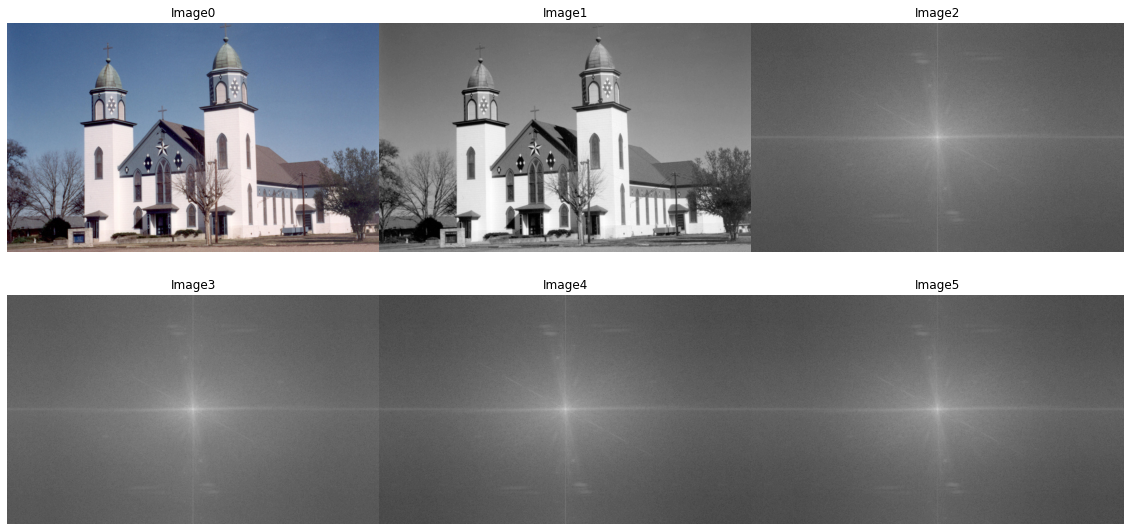

In [8]:
image_dft_frequency, dft_shift = DFT_Transformation(image_gray)
image_dft_frequency1, dft_shift1 = DFT_Transformation(image_color[:, :, 0])
image_dft_frequency2, dft_shift2 = DFT_Transformation(image_color[:, :, 1])
image_dft_frequency3, dft_shift3 = DFT_Transformation(image_color[:, :, 2])
ShowImage([image_color, image_gray, image_dft_frequency, image_dft_frequency1, image_dft_frequency2, image_dft_frequency3], 2, 3)

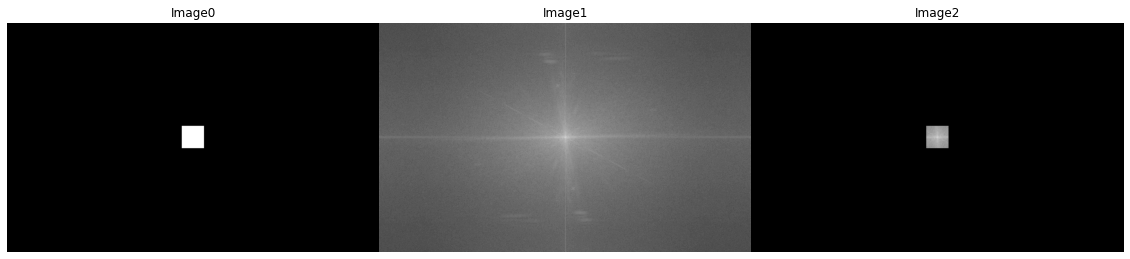

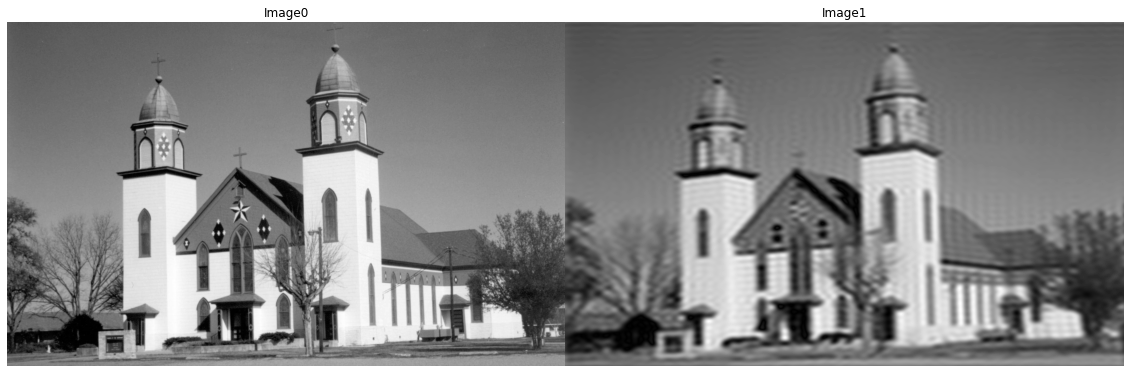

In [9]:
rows, cols = image_gray.shape
crow, ccol = (int)(rows/2), (int)(cols/2)

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
size = 50
mask[crow-size: crow+size, ccol-size: ccol+size] = 1
image_dft_frequency_crop = image_dft_frequency*mask[:, :, 0]

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_inverse = cv2.idft(f_ishift)
image_inverse = cv2.magnitude(img_inverse[:, :, 0], img_inverse[:, :, 1])

ShowImage([mask[:, :, 0], image_dft_frequency, image_dft_frequency_crop], 1, 3)
ShowImage([image_gray, image_inverse], 1, 2)

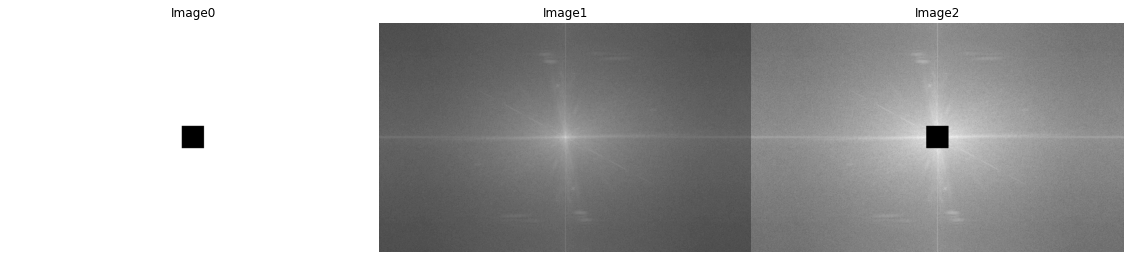

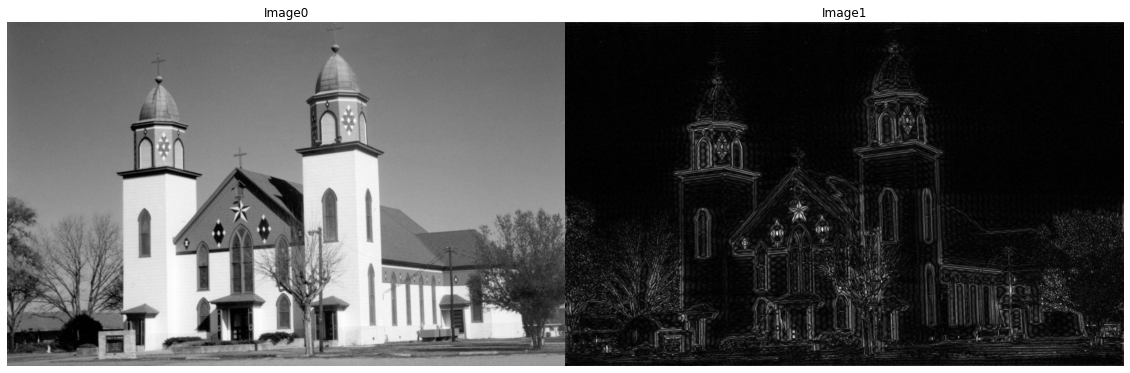

In [10]:
rows, cols = image_gray.shape
crow, ccol = (int)(rows/2) , (int)(cols/2)

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
size = 50
mask[crow-size: crow+size, ccol-size: ccol+size] = 1
mask = 1 - mask
image_dft_frequency_crop = image_dft_frequency*mask[:, :, 0]

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_inverse = cv2.idft(f_ishift)
image_inverse = cv2.magnitude(img_inverse[:, :, 0], img_inverse[:, :, 1])

ShowImage([mask[:, :, 0], image_dft_frequency, image_dft_frequency_crop], 1, 3)
ShowImage([image_gray, image_inverse], 1, 2)

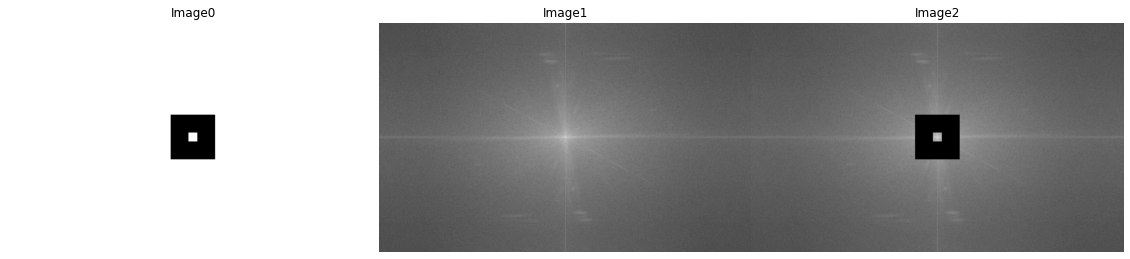

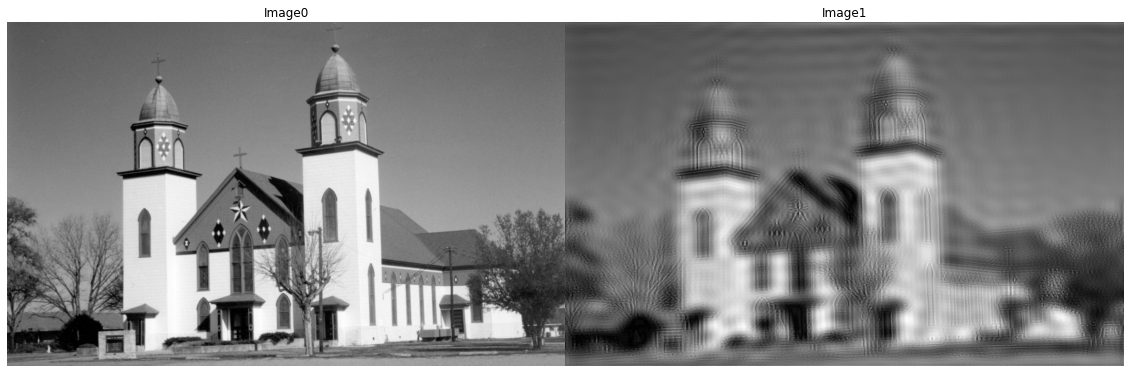

In [11]:
rows, cols = image_gray.shape
crow, ccol = (int)(rows/2), (int)(cols/2)

# create a mask first, center square is 1, remaining all zeros
mask1 = np.zeros((rows, cols, 2), np.uint8)
mask2 = np.zeros((rows, cols, 2), np.uint8)

size = 20
mask1[crow-size: crow+size, ccol-size: ccol+size] = 1

size = 100
mask2[crow-size: crow+size, ccol-size: ccol+size] = 1


mask = np.zeros((rows, cols, 2), np.uint8)
mask[(mask1 == 1) | (mask2 == 0)] = 1

image_dft_frequency_crop = image_dft_frequency*mask[:, :, 0]

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_inverse = cv2.idft(f_ishift)
image_inverse = cv2.magnitude(img_inverse[:, :, 0], img_inverse[:, :, 1])

ShowImage([mask[:, :, 0], image_dft_frequency, image_dft_frequency_crop], 1, 3)
ShowImage([image_gray, image_inverse], 1, 2)

2. Kiếm một ảnh trên internet và thực hiện các bước sau: 
* Chuyển đổi thành ảnh xám
* Biến đổi DCT và hiển thị ảnh DCT 
* Đặt ngưỡng giữ lại khoảng 5% hệ số DCT và hiển thị ảnh nén kết quả 

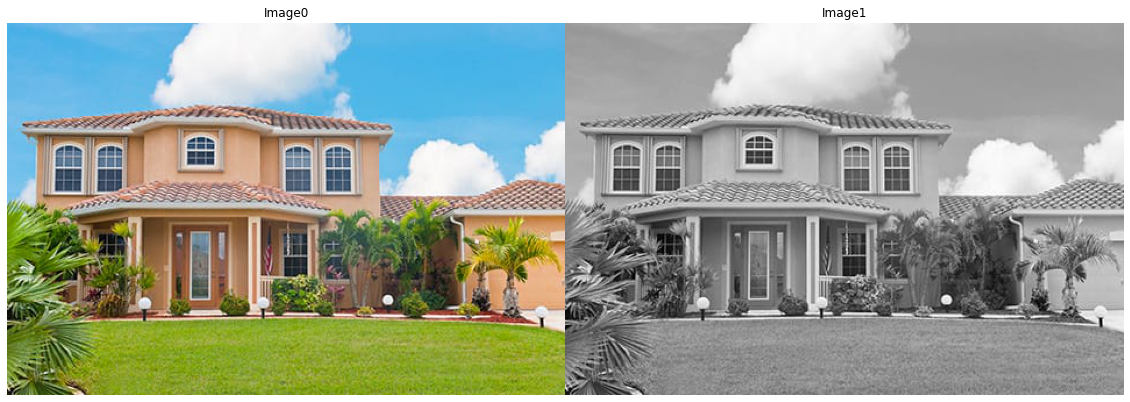

In [12]:
image_color = imread('house.jpg')
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

ShowImage([image_color, image_gray], 1, 2)

In [13]:
im = image_gray
imsize = im.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        dct[i:(i+8), j:(j+8)] = dct2(im[i:(i+8),j:(j+8)])

Text(0.5, 1.0, 'An 8x8 DCT block')

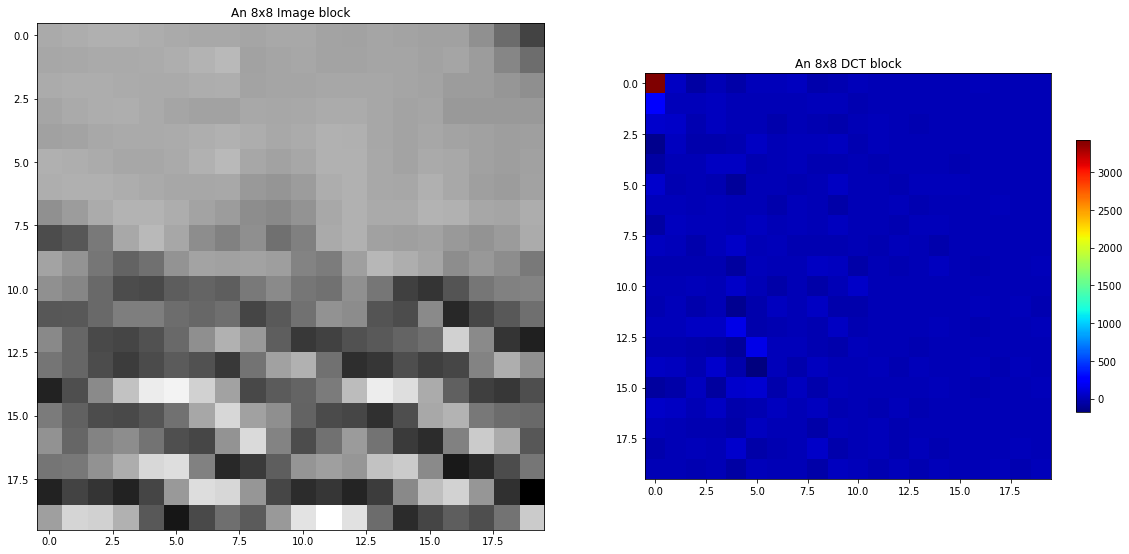

In [14]:
pos = 128
SampleBlock = im[pos:pos+20, pos:pos+20]
SampleDCT = dct2(SampleBlock)

plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.imshow(SampleBlock, cmap = 'gray')
plt.title('An 8x8 Image block')

# Display the dct of that block
plt.subplot(1, 2, 2)
plt.imshow(SampleDCT, cmap = cm.jet, interpolation = 'nearest')
plt.colorbar(shrink = 0.5)
plt.title('An 8x8 DCT block')

Text(0.5, 1.0, '8x8 DCTs of the image')

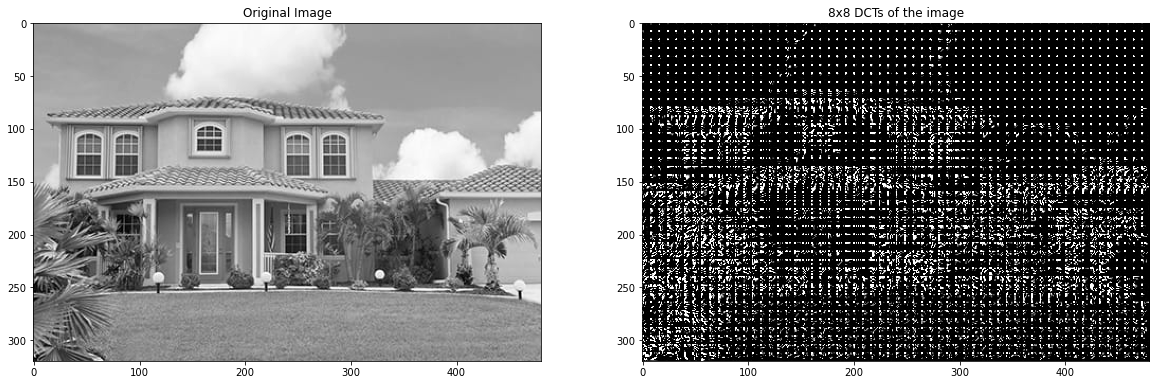

In [15]:
# Display entire DCT
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap = 'gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(dct, cmap = 'gray', vmax = np.max(dct)*0.01, vmin = 0)
plt.title('8x8 DCTs of the image')

Keeping only 11.974609% of the DCT coefficients
Comparison between original and DCT compressed images


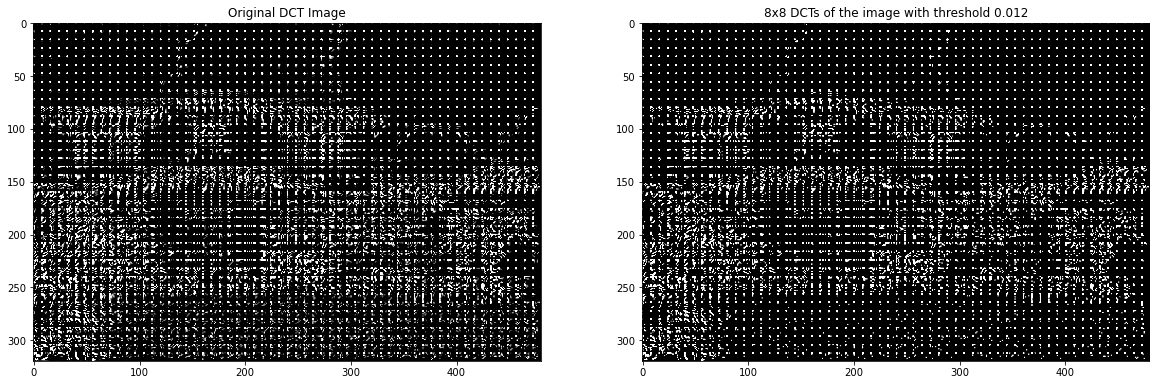

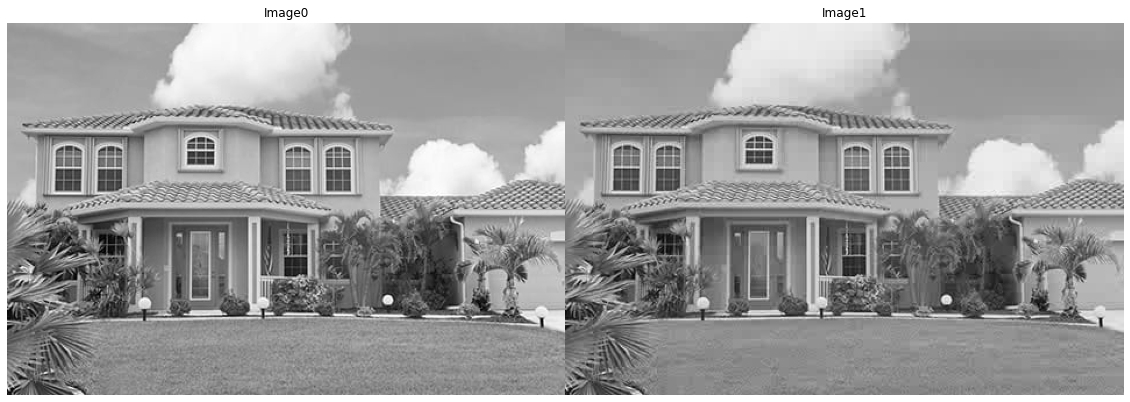

In [16]:
# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))

plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.imshow(dct, cmap = 'gray', vmax = np.max(dct)*0.01, vmin = 0)
plt.title('Original DCT Image')
plt.subplot(1, 2, 2)
plt.imshow(dct_thresh, cmap = 'gray', vmax = np.max(dct)*0.01, vmin = 0)
plt.title('8x8 DCTs of the image with threshold ' + str(thresh))


percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)
print('Keeping only %f%% of the DCT coefficients' % (percent_nonzeros*100.0))

im_dct = np.zeros(imsize)
for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        im_dct[i:(i+8), j:(j+8)] = idct2(dct_thresh[i:(i+8),j:(j+8)])
        
print('Comparison between original and DCT compressed images')
ShowImage([im, im_dct])

3. Kiếm một ảnh màu trên internet và thực hiện nén các ảnh này dùng DFT và DCT bằng cách giữ lại 5% hệ số. Sau đó khôi phục lại ảnh màu và lưu xuống thư mục cũng như xuất dung lượng ảnh xem giảm được bao nhiêu dung lượng

Keeping only 11.974609% of the DCT coefficients
Keeping only 12.619792% of the DFT coefficients
Comparison between original, DCT compressed and DFT compressed images


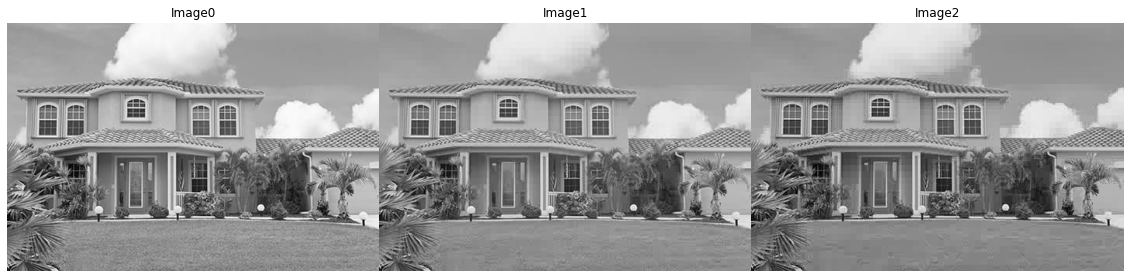

In [17]:
dft = np.zeros(imsize, dtype = 'complex');
im_dft = np.zeros(imsize, dtype = 'complex');

# 8x8 DFT
for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        dft[i:(i+8), j:(j+8)] = np.fft.fft2(im[i:(i+8), j:(j+8)])

# Thresh
thresh = 0.013
dft_thresh = dft*(abs(dft) > (thresh*np.max(abs(dft))))


percent_nonzeros_dft = np.sum( dft_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)
print('Keeping only %f%% of the DCT coefficients' % (percent_nonzeros*100.0))
print('Keeping only %f%% of the DFT coefficients' % (percent_nonzeros_dft*100.0))

# 8x8 iDFT
for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        im_dft[i:(i+8), j:(j+8)] = np.fft.ifft2(dft_thresh[i:(i+8),j:(j+8)])
        
print('Comparison between original, DCT compressed and DFT compressed images')
ShowImage([im, im_dct, abs(im_dft)], 1, 3)